In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn import linear_model

In [2]:
df = pd.read_excel("fake_panel.xlsx")

In [3]:
df.columns = ["country", "year", "gdp", "defence", "health", "sport", "education"]

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 270 entries, 0 to 269
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   country    270 non-null    object 
 1   year       270 non-null    int64  
 2   gdp        270 non-null    float64
 3   defence    270 non-null    float64
 4   health     270 non-null    float64
 5   sport      270 non-null    float64
 6   education  270 non-null    float64
dtypes: float64(5), int64(1), object(1)
memory usage: 14.9+ KB


In [5]:
df["gdp"].mean()

2.692

In [6]:
df["defence"].mean()

1.2433333333333334

In [7]:
df["health"].mean()

6.402962962962964

In [8]:
df["sport"].mean()

0.3877777777777777

In [9]:
df["education"].mean()

4.934814814814815

In [10]:
df["gdp"].autocorr()

-0.03978762506455344

In [11]:
df["defence"].autocorr()

0.7493858687716618

In [12]:
df["health"].autocorr()

0.8743926904226766

In [13]:
df["sport"].autocorr()

0.8522645932284458

In [14]:
df["education"].autocorr()

0.8858123400768985

In [15]:
df["gdp"].describe()

count    270.000000
mean       2.692000
std        3.849976
min      -10.940000
25%        1.242500
50%        2.575000
75%        4.367500
max       24.620000
Name: gdp, dtype: float64

In [16]:
df["gdp"].kurtosis()

5.273021107883682

In [17]:
X = df[["defence", "health", "sport", "education"]]
y = df["gdp"]

In [18]:
regression = linear_model.LinearRegression()
regression.fit(X, y)

LinearRegression()

In [19]:
regression.get_params(deep=True)

{'copy_X': True, 'fit_intercept': True, 'n_jobs': None, 'positive': False}

In [20]:
regression.score(X, y)

0.12678349088145913

In [21]:
regression.coef_

array([-1.29256698, -0.6610207 , -2.52752311, -0.12582597])

In [22]:
regression.predict([[1.0, 6.40, 0.39, 4.93]])

C:\Users\User\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([3.00347232])

In [23]:
regression.predict([[2.0, 6.40, 0.39, 4.93]])

C:\Users\User\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([1.71090534])

In [24]:
regression.predict([[3.0, 6.40, 0.39, 4.93]])

C:\Users\User\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([0.41833837])

In [25]:
regression.predict([[4.0, 6.40, 0.39, 4.93]])

C:\Users\User\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([-0.87422861])

In [26]:
regression.predict([[5.0, 6.40, 0.39, 4.93]])

C:\Users\User\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([-2.16679559])

In [27]:
from scipy import stats

In [28]:
#slope, intercept, r, p, std_err = stats.linregress(df["defence"], y)
#result = stats.linregress(df["defence"], y)
#result = stats.linregress(df["health"], y)
#result = stats.linregress(df["sport"], y)
result = stats.linregress(df["education"], y)

In [29]:
print(result.slope)
print(result.pvalue)
print(result.intercept)
print(result.rvalue * result.rvalue)
print(result.stderr)
#The Pearson correlation coefficient. The square of rvalue is equal to the coefficient of determination.

-0.7981742385842513
0.0007573759397455776
6.630842057369098
0.04151652057217524
0.23426755828633955


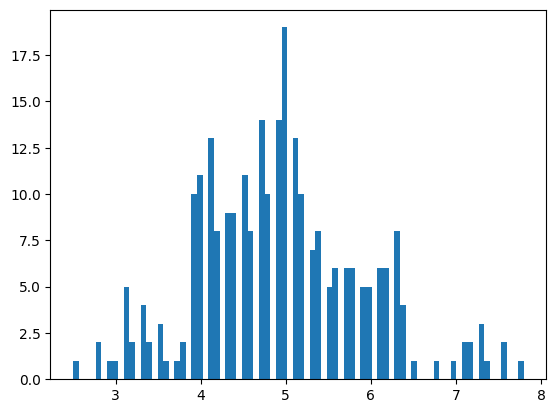

In [30]:
plt.hist(df["education"], bins=80)
plt.show()

In [31]:
import statsmodels as stm
from statsmodels.distributions.empirical_distribution import ECDF

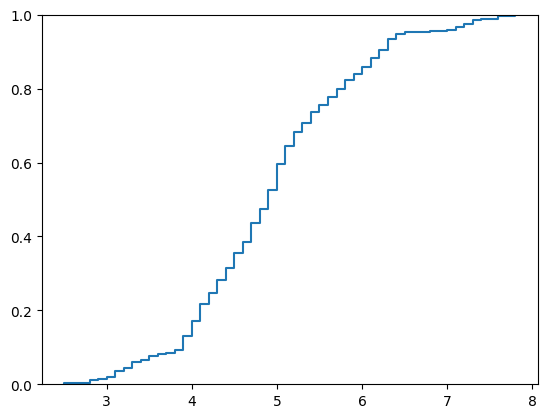

In [32]:
#Compute and plot the empirical cumulative distribution function of x. Here x = df["education"]
fig, ax = plt.subplots()
ax.ecdf(df["education"])
plt.show()

In [33]:
ecdf = ECDF(df["health"])

In [34]:
print('P(x<20): %.2f' % ecdf(20))
print('P(x<40): %.2f' % ecdf(40))
print('P(x<60): %.2f' % ecdf(60))

P(x<20): 1.00
P(x<40): 1.00
P(x<60): 1.00


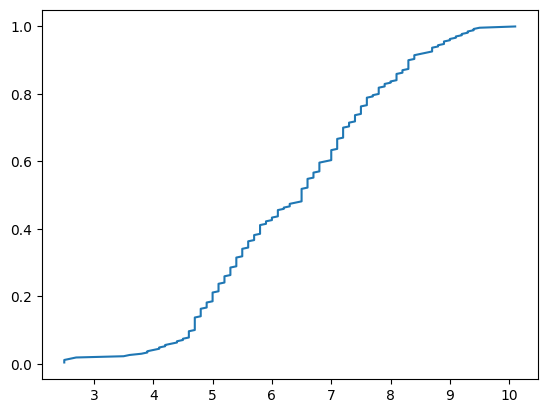

In [35]:
plt.plot(ecdf.x, ecdf.y)
plt.show()

In [36]:
#Augmented Dickey-Fuller test
#Null hypothesis (H0), the data has a unit root and is non-stationary.
from statsmodels.tsa.stattools import adfuller

In [37]:
result = adfuller(df["defence"])
print('ADF Statistic: %f' % result[0])
print('p-value: %f' % result[1])
print('Critical Values:')
for key, value in result[4].items():
	print('\t%s: %.3f' % (key, value))

ADF Statistic: -4.534863
p-value: 0.000170
Critical Values:
	1%: -3.456
	5%: -2.873
	10%: -2.573


In [41]:
#Phillips-Perron test
#Null hypothesis (H0), the data has a unit root and is non-stationary.
from arch.unitroot import PhillipsPerron as pp

In [70]:
pp_result = pp(df["defence"], trend="c")

In [71]:
print('PP Statistic: %f' % pp_result.stat)
print('p-value: %f' % pp_result.pvalue)
print('Critical Values:')
for key, value in pp_result.critical_values.items():
	print('\t%s: %.3f' % (key, value))

PP Statistic: -5.469729
p-value: 0.000002
Critical Values:
	1%: -3.455
	5%: -2.872
	10%: -2.573


In [72]:
from arch.unitroot import *

In [73]:
arch_adf_result = ADF(df["defence"], trend="c")

In [74]:
print(arch_adf_result.summary())

   Augmented Dickey-Fuller Results   
Test Statistic                 -4.535
P-value                         0.000
Lags                               10
-------------------------------------

Trend: Constant
Critical Values: -3.46 (1%), -2.87 (5%), -2.57 (10%)
Null Hypothesis: The process contains a unit root.
Alternative Hypothesis: The process is weakly stationary.
